# DAT210x - Programming with Python for DS

## Module6- Lab1

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import pandas as pd
import numpy as np 
import time
from sklearn import tree

Feel free to adjust and experiment with these parameters after you have completed the lab:

In [112]:
C = 1
kernel = 'linear'

In [131]:
# TODO: Change to 200000 once you get to Question#2
iterations = 5000

# You can set this to false if you want to draw the full square matrix:
FAST_DRAW = False

### Convenience Functions

In [114]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    # You can use this to break any higher-dimensional space down,
    # And view cross sections of it.

    # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0

    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap  = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors   = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.canvas.set_window_title(wintitle)
    fig.set_tight_layout(True)
    
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
            
            # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue

            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

            # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


            # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

            # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                                 np.arange(y_min, y_max, resolution))

            # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

            # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 4)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print("Max 2D Score: ", max_2d_score)

In [116]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print(wintitle + ' Results')
    s = time.time()
    
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        model.fit(X_train, y_train) 
        # .. your code here ..
        
    print("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
        # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test,y_test)
        # .. your code here ..
        
    print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print("High-Dimensionality Score: ", round((score*100), 4))

### The Assignment

Load up the wheat dataset into dataframe `X` and verify you did it properly. Indices shouldn't be doubled, nor should you have any headers with weird characters...

In [117]:
# .. your code here ..
X = pd.read_csv('Datasets/wheat.data',index_col=0)


In [76]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


Go ahead and drop any row with a nan:

In [77]:
# .. your code here ..
X = X.dropna(axis=1)
X[pd.isnull(X).any(axis=1)]

,area,perimeter,length,asymmetry,wheat_type
id,,,,,


In the future, you might try setting the nan values to the mean value of that column, the mean should only be calculated for the specific class rather than across all classes, now that you have the labels.

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we showed you in Module 5, such that `canadian:0`, `kama:1`, and `rosa:2`.

In [118]:
# .. your code here ..
X = pd.read_csv('Datasets/wheat.data',index_col=0)
X = X.dropna(axis=1)
X[pd.isnull(X).any(axis=1)]

y = X['wheat_type']
y = y.map({'canadian':0, 'kama':1, 'rosa':2})
X = X.drop('wheat_type',axis=1)
print(y.head())
print(X.head())
print(X.dtypes)

id
0    1
1    1
2    1
3    1
4    1
Name: wheat_type, dtype: int64
     area  perimeter  length  asymmetry
id                                     
0   15.26      14.84   5.763      2.221
1   14.88      14.57   5.554      1.018
2   14.29      14.09   5.291      2.699
3   13.84      13.94   5.324      2.259
4   16.14      14.99   5.658      1.355
area         float64
perimeter    float64
length       float64
asymmetry    float64
dtype: object


Split your data into a `test` and `train` set. Your `test` size should be 30% with `random_state` 7. Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [119]:
# .. your code here ..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

area         float64
perimeter    float64
length       float64
asymmetry    float64
dtype: object
area         float64
perimeter    float64
length       float64
asymmetry    float64
dtype: object
int64
int64


Create an SVC classifier named `svc` and use a linear kernel. You already have `C` defined at the top of the lab, so just set `C=C`.

In [120]:
# .. your code here ..
svc = SVC(kernel=kernel, C=C)

Create an KNeighbors classifier named `knn` and set the neighbor count to `5`:

In [127]:
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [149]:
dtree = tree.DecisionTreeClassifier(max_depth=8, random_state=2)

### Fire it Up:

In [150]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

KNeighbors Results
('5000 Iterations Training Time: ', 2.474281072616577)
('5000 Iterations Scoring Time: ', 4.845346927642822)
('High-Dimensionality Score: ', 90.4762)
('Max 2D Score: ', 90.4762)


In [133]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')

SVC Results
('5000 Iterations Training Time: ', 4.0805981159210205)
('5000 Iterations Scoring Time: ', 2.0424540042877197)
('High-Dimensionality Score: ', 95.2381)
('Max 2D Score: ', 95.2381)


In [151]:
benchmark(dtree, X_train, X_test, y_train, y_test, 'Decision Tree')
drawPlots(dtree, X_train, X_test, y_train, y_test, 'Decision Tree')

Decision Tree Results
('5000 Iterations Training Time: ', 3.7217748165130615)
('5000 Iterations Scoring Time: ', 2.0629429817199707)
('High-Dimensionality Score: ', 76.1905)
('Max 2D Score: ', 88.8889)


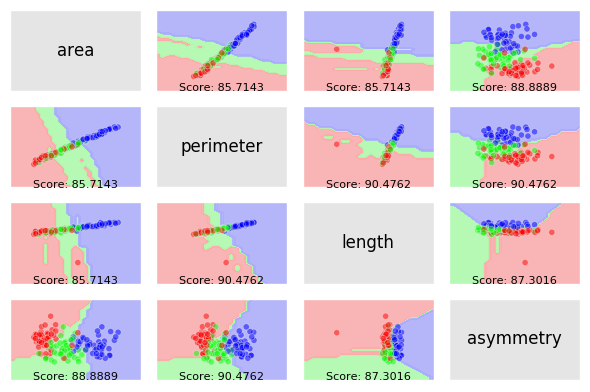

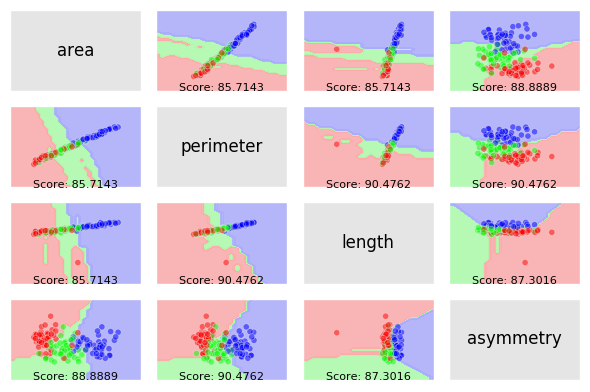

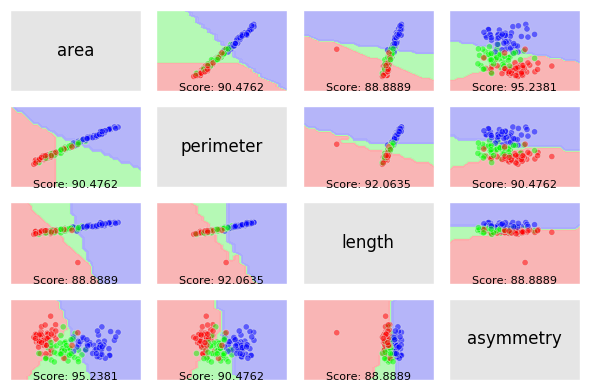

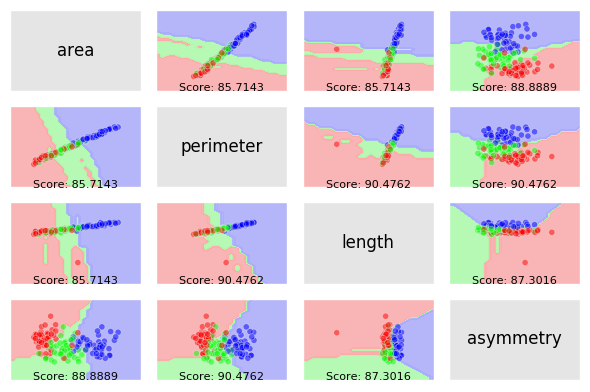

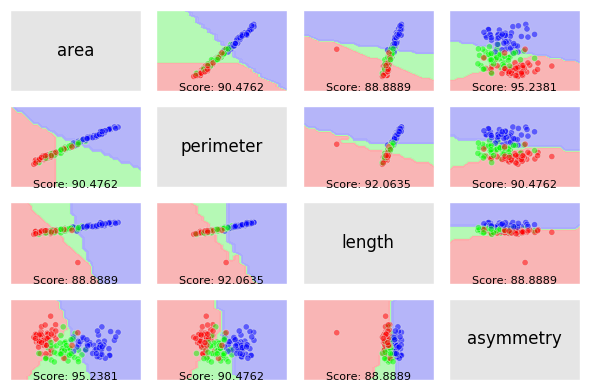

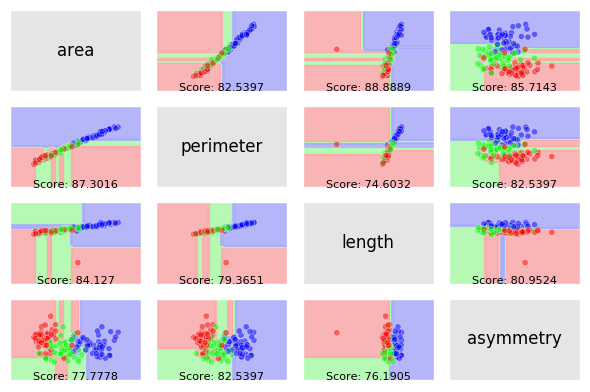

In [135]:
plt.show()

### Bonus:

After submitting your answers, mess around with the gamma, kernel, and C values.

In [142]:
dtree.fit(X_train,y_train)
dtree.tree_

In [147]:
tree.export_graphviz(dtree, out_file='tree.dot', feature_names=X.columns)

In [148]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

OSError: [Errno 2] No such file or directory